In [14]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Here we want to understand random walks in 2D and 3D. We start from the origin, and take a step of unit length in a random direction. 

For classical particles, the RMS displacement with time is given by-

$\langle r^2 \rangle = 2dDt$,

where d is the dimension of the system, D is the diffusion constant, and t is time. 

In the Monte carlo simulations, the number of steps will be a proxy for time. 

Another thing to keep in mind is that we are looking at this displacement after a long time (at a time scale much longer than the collision time)

In [9]:
num_steps = 1000

rx = [0]
ry = [0]

for i in np.arange(num_steps):
    rxi = np.random.uniform(-1.0,1.0)
    ryi = np.random.uniform(-1.0,1.0)

    norm = np.sqrt(rxi**2 + ryi**2)
    rxi = rxi/norm
    ryi = ryi/norm

    rx.append(rx[i]+rxi)
    ry.append(ry[i]+ryi)

plot the trajectory of a particle undergoing a 2D random walk (for 1000 steps)

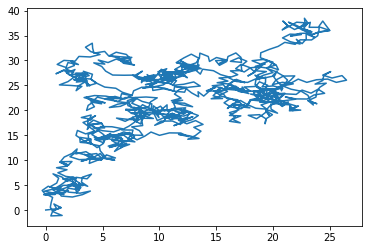

In [13]:
plt.plot(rx,ry)

Now we extend the 2D diffusion to 3D diffusion. 

In [112]:
num_steps = 1000
rx = [0]
ry = [0]
rz = [0]

#here we use spherical coordinates, beacuse now we can fix the 
#radius to be 1 and generate only random angles- it is more
#efficient computationally. But generating $\theta$ and $\phi$
#randomly will not sample the space uniformly

for i in np.arange(num_steps):
    u = np.random.uniform(0.0,1.0)
    v = np.random.uniform(0.0,1.0)

    theta = 2.0*np.pi*u
    phi = np.arccos(2.0*v - 1.0)

    rx.append(rx[i]+np.cos(theta)*np.sin(phi))
    ry.append(ry[i]+np.sin(theta)*np.sin(phi))
    rz.append(rz[i]+np.cos(phi))


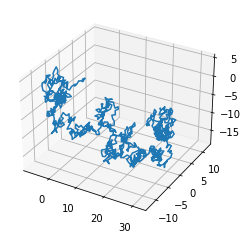

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.plot(rx,ry,rz)

Okay, we have generated a trajectory, and now we need to calculate root mean square displacement, $\langle r^2 \rangle (n)$. The averaging for displacement is done as follows-

the variable "i" here loops over the number of steps, and j loops over the number of possible combinations for the number of steps given.

Foe example, if i=1, that means we will average over the displacement from 1->2, 2->3, ....(n-1)->n. 

If i=2, then wwe average over 1->3, 2->4,3->5 and so on..

In [114]:
ax.grid()
t = []

msd = np.zeros(num_steps-2)
msd_theor = []

for i in np.arange(1,num_steps-1,1):
    t.append(i)
    msd_theor.append(float(i))

    l = 0 # to average over trajectories
    for j in np.arange(num_steps-i):
        l = l + 1
        msd[i -1] += ((rx[j+i]-rx[j])**2 + (ry[j+i]-ry[j])**2 + (ry[j+i]-ry[j])**2)

    msd[i-1]/=float(l)


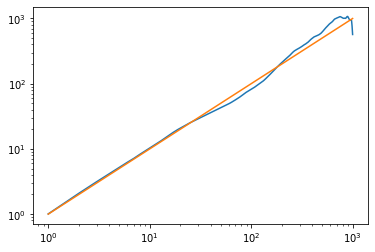

In [115]:
fig2, ax2 = plt.subplots();

ax2.loglog(t, msd, label = 'MSD(t)')

ax2.loglog(t, msd_theor,label= 't')

plt.show()

A slight detour, to show that the points generated by randomly sampling $\theta$ and $\phi$ from 0 to $2 \pi$ and 0 to $\pi$ respectively are more dense towards the pole than the equator

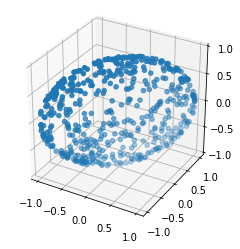

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

num_steps = 500
theta1 = [0]
phi1 = [0]

for i in np.arange(num_steps):
    u = np.random.uniform(0.0,1.0)
    v = np.random.uniform(0.0,1.0)

    theta = 2.0*np.pi*u
    phi = np.arccos(2.0*v - 1.0)
    
    theta1.append(theta)
    phi1.append(phi)

R = 1
X = R * np.cos(theta1)*np.sin(phi1)
Y = R * np.cos(theta1)*np.sin(phi1)
Z = R * np.cos(phi1)
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.set_zlim(-1,1)
ax.set_box_aspect(aspect = (1,1, 1))

plot = ax.scatter3D(X, Y, Z)

plt.show()

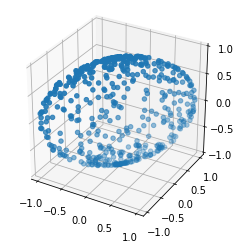

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

num_steps = 500
theta1 = [0]
phi1 = [0]

for i in np.arange(num_steps):
    theta = 2*np.pi*np.random.uniform(0.0,1.0)
    phi = np.pi*np.random.uniform(0.0,1.0)
    
    theta1.append(theta)
    phi1.append(phi)

R = 1
X = R * np.cos(theta1)*np.sin(phi1)
Y = R * np.cos(theta1)*np.sin(phi1)
Z = R * np.cos(phi1)
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.set_zlim(-1,1)
ax.set_box_aspect(aspect = (1,1, 1))

plot = ax.scatter3D(X, Y, Z)

plt.show()